# Mechanisms

In [2]:
from __future__ import print_function, division, absolute_import

import sys

import qminospy
from qminospy.me2 import ME_NLP

# python imports
from copy import copy
import re
from os.path import join, dirname, abspath
import sys
from collections import defaultdict
import pickle

# third party imports
import pandas as pd
import cobra
from tqdm import tqdm
import numpy as np
import scipy

# COBRAme
import cobrame
from cobrame.util import building, mu, me_model_interface
from cobrame.io.json import save_json_me_model, save_reduced_json_me_model

# ECOLIme
import bacillusme
from bacillusme import (transcription, translation, flat_files, generics, formulas, compartments)
from bacillusme.util.helper_functions import *

import copy
%load_ext autoreload
%autoreload 2
ecoli_files = dirname(abspath(bacillusme.__file__))
plt.rcParams['svg.fonttype'] = 'none'

/home/jt/work/cobrapy-0.5.11/cobra/io/sbml3.py:24: UserWarning: Install lxml for faster SBML I/O
  warn("Install lxml for faster SBML I/O")
/home/jt/work/cobrapy-0.5.11/cobra/io/__init__.py:12: UserWarning: cobra.io.sbml requires libsbml
  warn("cobra.io.sbml requires libsbml")


/home/jt/work/cobrapy-0.5.11/cobra/__init__.py
/home/jt/work/cobrame/cobrame/__init__.py
/home/jt/work/sporeme/bacillusme/__init__.py


In [3]:
with open("./sporeme_solution_v4_proteomics_spoAQ.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

## ATP mechanisms

In [4]:
annotation = pd.read_csv('Supplementary Files/Supplementary File 2.csv',index_col=0)

In [5]:
pd.set_option('display.max_colwidth', None)

In [6]:
df = flux_based_reactions(sporeme,'atp_s',only_types=['MetabolicReaction'],growth_symbol = 'sigma')

In [7]:
sporeme.solution.x_dict["biomass_dilution_s"]

0.017942047119140624

In [8]:
prod_df = df[df['met_flux']>0]['met_flux']
prod_df.div(prod_df.sum())

PYK_FWD_BSU29180-MONOMER_mod_mn2_mod_k_s       0.504434
SUCOAS_REV_CPLX8J2-7_s                         0.274147
PGK_REV_BSU33930-MONOMER_s                     0.221419
FACOAL161_ISO_REV_BSU18250-MONOMER_s         2.7879e-20
FACOAL140_FWD_BSU18250-MONOMER_s             2.7879e-20
NDPK6_FWD_BSU22730-MONOMER_mod_mn2_s        4.36302e-37
Name: met_flux, dtype: object

In [313]:
for r in prod_df.div(prod_df.sum()).index:
    r = sporeme.reactions.get_by_id(r)
    print(r.id)
    print(r.reaction)
    print()

PYK_FWD_BSU29180-MONOMER_mod_mn2_mod_k_s
adp_s + h_s + pep_s --> -7.24275931761575e-7*sigma BSU29180-MONOMER_mod_mn2_mod_k_s + atp_s + pyr_s

SUCOAS_REV_CPLX8J2-7_s
adp_s + pi_s + succoa_s --> -4.27350427350427e-6*sigma CPLX8J2-7_s + atp_s + coa_s + succ_s

PGK_REV_BSU33930-MONOMER_s
13dpg_s + adp_s --> 3pg_s + -2.74039393386779e-6*sigma BSU33930-MONOMER_s + atp_s

FACOAL140_FWD_BSU18250-MONOMER_s
atp_s + coa_s + ttdca_s --> -4.27350427350427e-6*sigma BSU18250-MONOMER_s + amp_s + ppi_s + tdcoa_s

FACOAL161_ISO_REV_BSU18250-MONOMER_s
amp_s + fa5coa_s + ppi_s --> -4.27350427350427e-6*sigma BSU18250-MONOMER_s + atp_s + coa_s + fa5_s

NDPK6_FWD_BSU22730-MONOMER_mod_mn2_s
atp_s + dudp_s --> -4.27350427350427e-6*sigma BSU22730-MONOMER_mod_mn2_s + adp_s + dutp_s



In [34]:
flux_based_reactions(sporeme,"ump_s",growth_symbol='sigma', only_types = ["MetabolicReaction"])

,lb,ub,rxn_flux,met_flux,reaction
UMPK_FWD_BSU22890-MONOMER_mod_mg2_s,0,999999,0.0213492,-0.0213492,atp_s + ump_s --> -4.27350427350427e-6*sigma BSU22890-MONOMER_mod_mg2_s + adp_s + udp_s
TECA4S_BS_FWD_CPLX000-68_s,0,999999,0.000583697,0.0175109,30.0 h2o_s + 30.0 uacgala_s + 30.0 udpg_s --> -4.27350427350427e-6*sigma CPLX000-68_s + 60.0 h_s + tcam_BS_s + 30.0 udp_s + 30.0 ump_s
UMPt6_FWD_PORE-CPLX_s,0,999999,0.000834904,0.000834904,h_c + ump_c --> -4.27350427350427e-6*sigma PORE-CPLX_s + h_s + ump_s
TECA1S45_FWD_CPLX000-65_s,0,999999,6.5022e-05,6.5022e-05,45.0 cdpglyc_s + uacgam_s + uacmam_s --> -4.27350427350427e-6*sigma CPLX000-65_s + 45.0 cmp_s + gtca1_45_BS_s + 46.0 h_s + udp_s + ump_s
TECA3S45_FWD_CPLX000-67_s,0,999999,5.45546e-05,5.45546e-05,45.0 cdpglyc_s + h2o_s + uacgam_s + uacmam_s + 45.0 udpg_s --> -4.27350427350427e-6*sigma CPLX000-67_s + 45.0 cmp_s + gtca3_45_BS_s + 91.0 h_s + 46.0 udp_s + ump_s
TECA2S45_FWD_CPLX000-66_s,0,999999,4.211e-05,4.211e-05,45.0 ala__D_s + 45.0 atp_s + 45.0 cdpglyc_s + 45.0 h2o_s + uacgam_s + uacmam_s --> -4.27350427350427e-6*sigma CPLX000-66_s + 45.0 amp_s + 45.0 cmp_s + gtca2_45_BS_s + 91.0 h_s + 45.0 ppi_s + udp_s + ump_s
TEICH45_FWD_CPLX000-69_s,0,999999,0,0,45.0 uacgala_s + 45.0 udpglcur_s --> -4.27350427350427e-6*sigma CPLX000-69_s + 45.0 h_s + teich_45_BS_s + 45.0 udp_s + 45.0 ump_s
UMPt6_REV_PORE-CPLX_s,0,999999,0,-0,h_s + ump_s --> -4.27350427350427e-6*sigma PORE-CPLX_s + h_c + ump_c
URIK2_FWD_BSU27330-MONOMER_mod_mg2_s,0,999999,0,0,gtp_s + uri_s --> -4.27350427350427e-6*sigma BSU27330-MONOMER_mod_mg2_s + gdp_s + h_s + ump_s
URIK1_FWD_BSU27330-MONOMER_mod_mg2_s,0,999999,0,0,atp_s + uri_s --> -4.27350427350427e-6*sigma BSU27330-MONOMER_mod_mg2_s + adp_s + h_s + ump_s


In [366]:
annotation.loc["BSU33920"]

FS                                                      0
MC                                                      0
VG                                                      0
name                                                 tpiA
annotation                     triose phosphate isomerase
model_annotation    S_Carbohydrates_and_related_molecules
Name: BSU33920, dtype: object

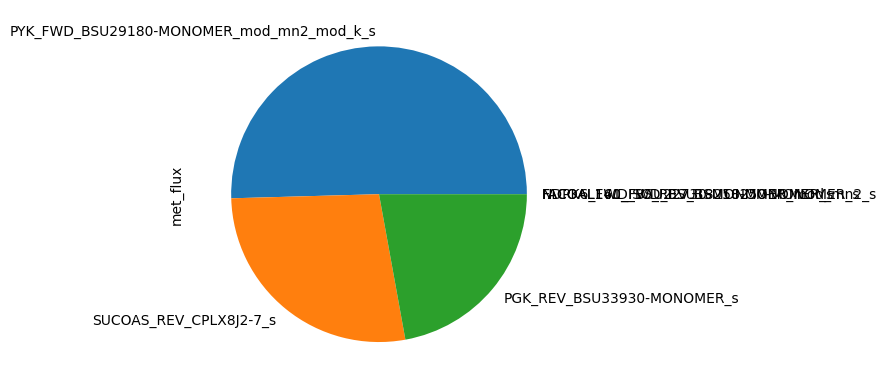

In [368]:
prod_df.plot.pie()
plt.savefig('figures/ATP_synthesis_spoAQ.svg',format='SVG')

# GFP comparison

In [16]:
with open("./sporeme_solution_v4_proteomics_spoAQ.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [17]:
plt.rcParams['svg.fonttype'] = 'none'

In [18]:
locus_to_name = pd.read_csv('../gene_name_dictionary.csv',index_col=0)['name'].to_dict()
name_to_locus = pd.read_csv('../gene_name_dictionary.csv',index_col=1)['locus_id'].to_dict()

In [19]:
confirmed_depletions = ['pckA','purL','ilvB','ilvE','citZ','acsA','etfA','acoC','sigF','yxbC','lutC',
                  'argJ','hpf']

In [20]:
l = ['scoB','argJ','citZ','pckA','ilvB','metE','lutC','argD','argB','pyrK','pdhD','gmk','cmk','eno','pyk','gapA']

In [21]:
set(l) & set(confirmed_depletions)

{'argJ', 'citZ', 'ilvB', 'lutC', 'pckA'}

In [22]:
d = {}
for g in l:
    locus = name_to_locus[g]
    if not sporeme.metabolites.query(locus):
        print(g, ' not in model')
        continue
    mc = sporeme.solution.x_dict['translation_{}'.format(locus)]
    fs = sporeme.solution.x_dict['translation_{}_s'.format(locus)]
    d[g] = {'mc':mc,'fs':fs}

lutC  not in model


In [23]:
df = pd.DataFrame.from_dict(d).T
df[df<1e-16] = 0
df = df.div(df.sum(axis=1),axis=0).fillna(0) * 100
df

,mc,fs
scoB,0.000000,0.000000
argJ,100.000000,0.000000
citZ,100.000000,0.000000
pckA,100.000000,0.000000
ilvB,100.000000,0.000000
metE,100.000000,0.000000
argD,100.000000,0.000000
argB,100.000000,0.000000
pyrK,100.000000,0.000000
pdhD,29.705039,70.294961


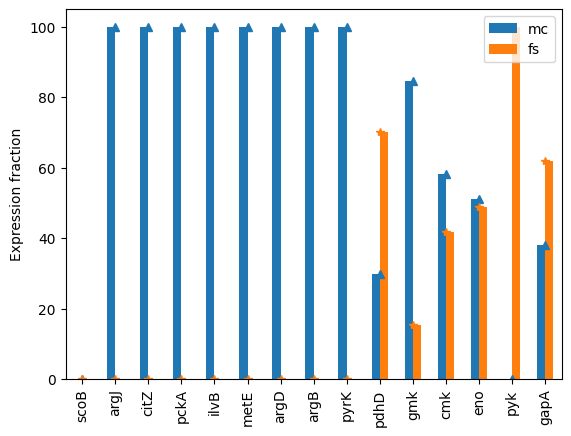

In [24]:
ax = df.plot.bar(stacked=False)
# ax.invert_yaxis()
plt.plot(df.index,df['mc'],'^')
plt.plot(df.index,df['fs'],'*')
plt.ylabel('Expression fraction')
plt.savefig('figures/STRP_comparison.svg',format='SVG')

## NADH mechanisms

In [13]:
df = flux_based_reactions(sporeme,'nadh_s',only_types=['MetabolicReaction'],growth_symbol = 'sigma')

In [14]:
prod_df = df[df['met_flux']>0]['met_flux']
prod_df.div(prod_df.sum())

AKGDH_FWD_CPLX000-5_s             0.548124
GAPD_FWD_BSU33940-MONOMER_s       0.442702
PDH_FWD_CPLX000-61_s            0.00818645
OIVD3_FWD_CPLX000-60_s         0.000468215
OIVD1r_FWD_CPLX000-58_s        0.000247879
MDH_FWD_BSU29120-MONOMER_s     0.000216493
OIVD2_FWD_CPLX000-59_s         5.50842e-05
Name: met_flux, dtype: object

In [15]:
for r in prod_df.div(prod_df.sum()).index:
    r = sporeme.reactions.get_by_id(r)
    print(r.id)
    print(r.reaction)
    print()

AKGDH_FWD_CPLX000-5_s
akg_s + coa_s + nad_s --> -4.27350427350427e-6*sigma CPLX000-5_s + co2_s + nadh_s + succoa_s

GAPD_FWD_BSU33940-MONOMER_s
g3p_s + nad_s + pi_s --> 13dpg_s + -3.097226360771e-6*sigma BSU33940-MONOMER_s + h_s + nadh_s

PDH_FWD_CPLX000-61_s
coa_s + nad_s + pyr_s --> -4.27350427350427e-6*sigma CPLX000-61_s + accoa_s + co2_s + nadh_s

OIVD3_FWD_CPLX000-60_s
3mop_s + coa_s + nad_s --> 2mbcoa_s + -4.27350427350427e-6*sigma CPLX000-60_s + co2_s + nadh_s

OIVD1r_FWD_CPLX000-58_s
4mop_s + coa_s + nad_s --> -4.27350427350427e-6*sigma CPLX000-58_s + co2_s + ivcoa_s + nadh_s

MDH_FWD_BSU29120-MONOMER_s
mal__L_s + nad_s --> -1.93076423348459e-6*sigma BSU29120-MONOMER_s + h_s + nadh_s + oaa_s

OIVD2_FWD_CPLX000-59_s
3mob_s + coa_s + nad_s --> -4.27350427350427e-6*sigma CPLX000-59_s + co2_s + ibcoa_s + nadh_s



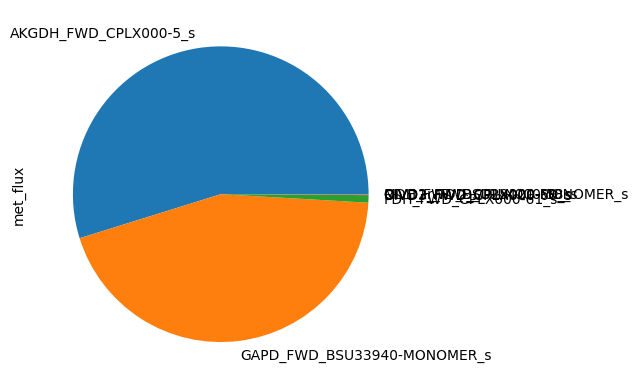

In [372]:
prod_df.plot.pie()
plt.savefig('figures/NADH_synthesis_spoAQ.svg',format='SVG')

In [ ]:
locus_to_name['BSU19370']

In [ ]:
flux_based_reactions(sporeme,'CPLX000-61_s',growth_symbol = 'sigma')

In [ ]:
flux_based_reactions(sporeme,'CPLX000-5_s',growth_symbol = 'sigma')

In [30]:
flux_based_reactions(sporeme,'nadh_s',growth_symbol = 'sigma')

,lb,ub,rxn_flux,met_flux,reaction
LDH_L_REV_BSU03050-MONOMER_s,0,999999,6.25164,-6.25164,h_s + nadh_s + pyr_s --> -9.97575592480009e-5*sigma BSU03050-MONOMER_s + lac__L_s + nad_s
AKGDH_FWD_CPLX000-5_s,0,999999,3.43246,3.43246,akg_s + coa_s + nad_s --> -4.27350427350427e-6*sigma CPLX000-5_s + co2_s + nadh_s + succoa_s
GAPD_FWD_BSU33940-MONOMER_s,0,1000,2.77228,2.77228,g3p_s + nad_s + pi_s --> 13dpg_s + -3.097226360771e-6*sigma BSU33940-MONOMER_s + h_s + nadh_s
PDH_FWD_CPLX000-61_s,0,999999,0.0512651,0.0512651,coa_s + nad_s + pyr_s --> -4.27350427350427e-6*sigma CPLX000-61_s + accoa_s + co2_s + nadh_s
GLUDxi_REV_BSU22960-MONOMER_s,0,1000,0.00810987,-0.00810987,akg_s + h_s + nadh_s + nh4_s --> -4.27350427350427e-6*sigma BSU22960-MONOMER_s + glu__L_s + h2o_s + nad_s
...,...,...,...,...,...
ALDD17_FWD_BSU19310-MONOMER_s,0,999999,0,0,h2o_s + hpdcal_s + nad_s --> -4.27350427350427e-6*sigma BSU19310-MONOMER_s + 2.0 h_s + hpdca_s + nadh_s
GAPD_REV_BSU33940-MONOMER_s,0,1000,0,-0,13dpg_s + h_s + nadh_s --> -3.097226360771e-6*sigma BSU33940-MONOMER_s + g3p_s + nad_s + pi_s
ALDD8_FWD_BSU39860-MONOMER_s,0,999999,0,0,h2o_s + nad_s + octal_s --> -4.27350427350427e-6*sigma BSU39860-MONOMER_s + 2.0 h_s + nadh_s + octa_s
HOXPRx_FWD_BSU13960-MONOMER_s,0,999999,0,0,glyc__R_s + nad_s --> 2h3opp_s + -3.47688001042945e-6*sigma BSU13960-MONOMER_s + h_s + nadh_s


In [33]:
flux_based_reactions(sporeme,'nadh_c',growth_symbol = 'sigma')

,lb,ub,rxn_flux,met_flux,reaction
NADH4_FWD_BSU32200-MONOMER,0,999999,11.3555,-11.3555,h_c + mqn7_c + nadh_c --> -4.27350427350427e-6*sigma BSU32200-MONOMER + mql7_c + nad_c
LDH_L_FWD_BSU03050-MONOMER,0,999999,6.25164,6.25164,lac__L_c + nad_c --> -9.97575592480009e-5*sigma BSU03050-MONOMER + h_c + nadh_c + pyr_c
MDH_FWD_BSU29120-MONOMER,0,999999,3.47848,3.47848,mal__L_c + nad_c --> -1.93076423348459e-6*sigma BSU29120-MONOMER + h_c + nadh_c + oaa_c
GLUDxi_FWD_BSU22960-MONOMER,0,1000,1.73225,1.73225,glu__L_c + h2o_c + nad_c --> -4.27350427350427e-6*sigma BSU22960-MONOMER + akg_c + h_c + nadh_c + nh4_c
GAPD_REV_BSU33940-MONOMER,0,1000,1.69942,-1.69942,13dpg_c + h_c + nadh_c --> -3.097226360771e-6*sigma BSU33940-MONOMER + g3p_c + nad_c + pi_c
...,...,...,...,...,...
TARTRDH_REV_BSU04000-MONOMER_mod_mg2_mod_k,0,999999,0,-0,h_c + nadh_c + oxglyc_c --> -4.27350427350427e-6*sigma BSU04000-MONOMER_mod_mg2_mod_k + nad_c + tartr__L_c
UDPGD_REV_BSU35580-MONOMER,0,999999,0,-0,3.0 h_c + 2.0 nadh_c + udpglcur_c --> -7.6432684724297e-5*sigma BSU35580-MONOMER + h2o_c + 2.0 nad_c + udpg_c
DHBD_FWD_BSU32000-MONOMER,0,999999,0,0,23ddhb_c + nad_c --> 23dhb_c + -4.59640513785848e-6*sigma BSU32000-MONOMER + h_c + nadh_c
ALDD1_FWD_BSU38830-MONOMER,0,999999,0,0,fald_c + h2o_c + nad_c --> -4.27350427350427e-6*sigma BSU38830-MONOMER + for_c + 2.0 h_c + nadh_c


In [27]:
flux_based_reactions(sporeme,'pyr_c',growth_symbol = 'sigma')

,lb,ub,rxn_flux,met_flux,reaction
LDH_L_FWD_BSU03050-MONOMER,0,999999,6.25164,6.25164,lac__L_c + nad_c --> -9.97575592480009e-5*sigma BSU03050-MONOMER + h_c + nadh_c + pyr_c
PC_FWD_BSU14860-MONOMER,0,999999,4.70775,-4.70775,atp_c + hco3_c + pyr_c --> -4.27350427350427e-6*sigma BSU14860-MONOMER + adp_c + h_c + oaa_c + pi_c
PDH_FWD_CPLX000-61,0,999999,1.47214,-1.47214,coa_c + nad_c + pyr_c --> -4.27350427350427e-6*sigma CPLX000-61 + accoa_c + co2_c + nadh_c
ACLS_FWD_CPLX8J2-23,0,999999,0.0204609,-0.0409218,h_c + 2.0 pyr_c --> -4.27350427350427e-6*sigma CPLX8J2-23 + alac__S_c + co2_c
ALATA_L_REV_BSU31400-MONOMER,0,999999,0.0132312,-0.0132312,glu__L_c + pyr_c --> -1.20003594272506e-5*sigma BSU31400-MONOMER + akg_c + ala__L_c
DHDPS_FWD_BSU16770-MONOMER,0,999999,0.0120372,-0.0120372,aspsa_c + pyr_c --> 23dhdp_c + -1.51377311646336e-5*sigma BSU16770-MONOMER + 2.0 h2o_c + h_c
ACHBS_FWD_BSU36010-MONOMER,0,999999,0.00687563,-0.00687563,2obut_c + h_c + pyr_c --> 2ahbut_c + -4.27350427350427e-6*sigma BSU36010-MONOMER + co2_c
ANS_FWD_CPLX8J2-252,0,999999,0.0013105,0.0013105,chor_c + gln__L_c --> -4.27350427350427e-6*sigma CPLX8J2-252 + anth_c + glu__L_c + h_c + pyr_c
ADCL_FWD_BSU00760-MONOMER,0,999999,6.58473e-06,6.58473e-06,4adcho_c --> 4abz_c + -3.9573032156308e-6*sigma BSU00760-MONOMER + h_c + pyr_c
MCITL2_REV_BSU24120-MONOMER,0,999999,0,-0,pyr_c + succ_c --> -3.28713650713023e-6*sigma BSU24120-MONOMER + micit_c


In [29]:
flux_based_reactions(sporeme,'lac__L_s',growth_symbol = 'sigma')

,lb,ub,rxn_flux,met_flux,reaction
LDH_L_REV_BSU03050-MONOMER_s,0,999999,6.25164,6.25164,h_s + nadh_s + pyr_s --> -9.97575592480009e-5*sigma BSU03050-MONOMER_s + lac__L_s + nad_s
L_LACt2r_REV_PORE-CPLX_s,0,999999,6.22152,-6.22152,h_s + lac__L_s --> -4.27350427350427e-6*sigma PORE-CPLX_s + h_c + lac__L_c
MALt10_FWD_PORE-CPLX_s,0,999999,0.0301261,-0.0301261,2.0 h_c + lac__L_s + mal__L_c + na1_s --> -4.27350427350427e-6*sigma PORE-CPLX_s + 2.0 h_s + lac__L_c + mal__L_s + na1_c
LDH_L_FWD_BSU03050-MONOMER_s,0,999999,0,-0,lac__L_s + nad_s --> -9.97575592480009e-5*sigma BSU03050-MONOMER_s + h_s + nadh_s + pyr_s
LCADi_FWD_BSU19310-MONOMER_s,0,999999,0,0,h2o_s + lald__L_s + nad_s --> -1.3562010910468e-6*sigma BSU19310-MONOMER_s + 2.0 h_s + lac__L_s + nadh_s
L_LACt2r_FWD_PORE-CPLX_s,0,999999,0,0,h_c + lac__L_c --> -4.27350427350427e-6*sigma PORE-CPLX_s + h_s + lac__L_s
LCADi_FWD_BSU39860-MONOMER_s,0,999999,0,0,h2o_s + lald__L_s + nad_s --> -4.27350427350427e-6*sigma BSU39860-MONOMER_s + 2.0 h_s + lac__L_s + nadh_s
LCADi_FWD_BSU38830-MONOMER_s,0,999999,0,0,h2o_s + lald__L_s + nad_s --> -4.27350427350427e-6*sigma BSU38830-MONOMER_s + 2.0 h_s + lac__L_s + nadh_s


## Closing mechanisms

In [26]:
with open("./sporeme_solution_v4_proteomics_spoAQ.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [27]:
base_mu = sporeme.solution.x_dict['biomass_dilution_s']
base_mu

0.017942047119140624

#### Pyk

In [28]:
main_mechanisms = ['translation_BSU29180_s'] # Pyk

In [29]:
for r in main_mechanisms:
    sporeme.reactions.get_by_id(r).bounds = (0,0)

In [30]:
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-3,growth_key = 'sigma')

iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 59.837078 seconds
Finished substituting S,lb,ub in 2.456645 seconds
Finished makeME_LP in 0.287161 seconds
Getting MINOS parameters from ME_NLP...
 Allocating name1, name2
 Allocating pi, rc, xn
 Allocated pi, rc, xn
 No Jacobian matrix since no nonlinear obj or constraints
C0028000000000000000000000000000
 C028000000000000
C0028000000000000000000000000000
C083D6329F1C35CA5000000000000000
 C83D6329F1C35CA5
C083D6329F1C35CA5000000000000000
4083D6329F1C35CA5000000000000000
 483D6329F1C35CA5
4083D6329F1C35CA5000000000000000
 Calling miopt to set option: Maximize
 Calling miopt to set option: Solution No
 Calling miopti to set option New basis file to           11
 Calling miopti to set option Save frequency to       500000
 Calling miopti to set option Print level to            0
 Calling miopti to set option Print frequency to       100000
 Calling miopti to set option Scale option to            2
 Calling mi

In [31]:
print("There is a {}% reduction in formation rate".format(int((base_mu - sporeme.solution.x_dict["biomass_dilution_s"])/base_mu*100)))

There is a 65% reduction in formation rate


#### PycA-PckA

In [36]:
with open("./sporeme_solution_v4_proteomics_spoAQ.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [37]:
main_mechanisms = ['translation_BSU30560', # PckA
                  'translation_BSU14860'] # PycA

In [38]:
for r in main_mechanisms:
    sporeme.reactions.get_by_id(r).bounds = (0,0)

In [39]:
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-3,growth_key = 'sigma')

iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 57.169943 seconds
Finished substituting S,lb,ub in 2.662841 seconds
Finished makeME_LP in 0.311074 seconds
Getting MINOS parameters from ME_NLP...
 Allocating name1, name2
 Allocating pi, rc, xn
 Allocated pi, rc, xn
 No Jacobian matrix since no nonlinear obj or constraints
C0028000000000000000000000000000
 C028000000000000
C0028000000000000000000000000000
C083D6329F1C35CA5000000000000000
 C83D6329F1C35CA5
C083D6329F1C35CA5000000000000000
4083D6329F1C35CA5000000000000000
 483D6329F1C35CA5
4083D6329F1C35CA5000000000000000
 Calling miopt to set option: Maximize
 Calling miopt to set option: Solution No
 Calling miopti to set option New basis file to           11
 Calling miopti to set option Save frequency to       500000
 Calling miopti to set option Print level to            0
 Calling miopti to set option Print frequency to       100000
 Calling miopti to set option Scale option to            2
 Calling mi

In [40]:
print("There is a {}% reduction in formation rate".format(int((base_mu - sporeme.solution.x_dict["biomass_dilution_s"])/base_mu*100)))

There is a 73% reduction in formation rate


#### Pyk-PycA-PckA

In [26]:
with open("./sporeme_solution_v4_proteomics_spoAQ.pickle", "rb") as outfile:
    sporeme = pickle.load(outfile)

In [32]:
main_mechanisms = ['translation_BSU29180_s', # Pyk
                   'translation_BSU30560', # PckA
                  'translation_BSU14860'] # PycA

In [33]:
for r in main_mechanisms:
    sporeme.reactions.get_by_id(r).bounds = (0,0)

In [34]:
solve_me_model(sporeme, max_mu = 0.1, min_mu = .01, using_soplex=False, precision = 1e-3,growth_key = 'sigma')

iter	muopt    	a     	b     	mu1       	stat1
Finished compiling expressions in 57.333245 seconds
Finished substituting S,lb,ub in 2.435149 seconds
Finished makeME_LP in 0.288106 seconds
Getting MINOS parameters from ME_NLP...
 Allocating name1, name2
 Allocating pi, rc, xn
 Allocated pi, rc, xn
 No Jacobian matrix since no nonlinear obj or constraints
C0028000000000000000000000000000
 C028000000000000
C0028000000000000000000000000000
C083D6329F1C35CA5000000000000000
 C83D6329F1C35CA5
C083D6329F1C35CA5000000000000000
4083D6329F1C35CA5000000000000000
 483D6329F1C35CA5
4083D6329F1C35CA5000000000000000
 Calling miopt to set option: Maximize
 Calling miopt to set option: Solution No
 Calling miopti to set option New basis file to           11
 Calling miopti to set option Save frequency to       500000
 Calling miopti to set option Print level to            0
 Calling miopti to set option Print frequency to       100000
 Calling miopti to set option Scale option to            2
 Calling mi

In [35]:
print("There is a {}% reduction in formation rate".format(int((base_mu - sporeme.solution.x_dict["biomass_dilution_s"])/base_mu*100)))

There is a 73% reduction in formation rate


In [17]:
flux_based_reactions(sporeme,'atp_s',only_types=['MetabolicReaction'],growth_symbol = 'sigma')

,lb,ub,rxn_flux,met_flux,reaction
PGK_REV_BSU33930-MONOMER_s,0,999999,7.49866,7.49866,13dpg_s + adp_s --> 3pg_s + -2.74039393386779e-6*sigma BSU33930-MONOMER_s + atp_s
SUCOAS_REV_CPLX8J2-7_s,0,999999,3.50852,3.50852,adp_s + pi_s + succoa_s --> -4.27350427350427e-6*sigma CPLX8J2-7_s + atp_s + coa_s + succ_s
PFK_FWD_BSU29190-MONOMER_s,0,999999,2.66173,-2.66173,atp_s + f6p_s --> -4.27350427350427e-6*sigma BSU29190-MONOMER_s + adp_s + fdp_s + h_s
ACKr_REV_BSU29470-MONOMER_s,0,999999,1.53539,1.53539,actp_s + adp_s --> -4.27350427350427e-6*sigma BSU29470-MONOMER_s + ac_s + atp_s
NDPK1_FWD_BSU22730-MONOMER_mod_mn2_s,0,1000,0.06128,-0.06128,atp_s + gdp_s --> -4.27350427350427e-6*sigma BSU22730-MONOMER_mod_mn2_s + adp_s + gtp_s
...,...,...,...,...,...
ARBabc_FWD_PORE-CPLX_s,0,999999,0,-0,arab__L_c + atp_s + h2o_s --> -4.27350427350427e-6*sigma PORE-CPLX_s + adp_s + arab__L_s + h_s + pi_s
TAURabc_FWD_PORE-CPLX_s,0,999999,0,-0,atp_s + h2o_s + taur_c --> -4.27350427350427e-6*sigma PORE-CPLX_s + adp_s + h_s + pi_s + taur_s
LANTHabc_FWD_PORE-CPLX_s,0,999999,0,-0,atp_s + h2o_s + lanth_c --> -4.27350427350427e-6*sigma PORE-CPLX_s + adp_s + h_s + lanth_s + pi_s
SUCOAS_FWD_CPLX8J2-7_s,0,999999,0,-0,atp_s + coa_s + succ_s --> -4.27350427350427e-6*sigma CPLX8J2-7_s + adp_s + pi_s + succoa_s
